In [1]:
import numpy as np
import pandas as pd


In [28]:
# data of COUNTRY, AGE, SALARY
data = [['India',38.0,68000.0],  
    ['France',43.0,45000.0],  
 ['Germany',30.0, 54000.0],  
 [np.nan ,np.nan, 65000.0], 
 ['Germany' ,40.0, np. nan],  
 ['India' ,35.0, 58000.0],  
 ['India', np.nan ,53000.0],  
 ['India' ,49.0 , 79000.0],  
 ['India', 50.0 ,88000.0],  
 ['France' ,37.0, np.nan]]  
    

In [29]:
df=pd.DataFrame(data,columns=['COUNTRY', 'AGE', 'SALARY'])
df

,COUNTRY,AGE,SALARY
0,India,38.0,68000.0
1,France,43.0,45000.0
2,Germany,30.0,54000.0
3,NaN,NaN,65000.0
4,Germany,40.0,NaN
5,India,35.0,58000.0
6,India,NaN,53000.0
7,India,49.0,79000.0
8,India,50.0,88000.0
9,France,37.0,NaN


In [4]:
#check null values
pl=df.isna().sum()
pl

COUNTRY    1
AGE        2
SALARY     2
dtype: int64

In [5]:
#plot NAN values
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Rakesh\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [24]:
pl.describe()

count    3.000000
mean     1.666667
std      0.577350
min      1.000000
25%      1.500000
50%      2.000000
75%      2.000000
max      2.000000
dtype: float64

<AxesSubplot:>

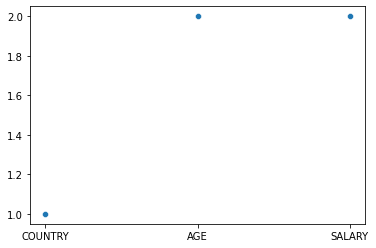

In [101]:
sns.scatterplot(data=pl)


<AxesSubplot:>

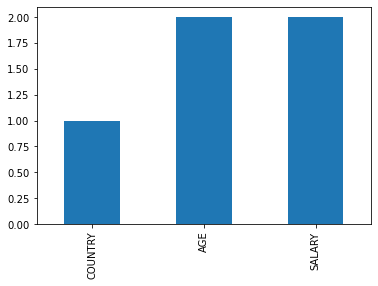

In [104]:
pl.plot.bar(sort_columns=False)

# Ways to handle missing data:¶

In [38]:
from sklearn.impute import SimpleImputer

In [39]:
si=SimpleImputer(strategy='most_frequent')
si

SimpleImputer(strategy='most_frequent')

In [40]:
df['Country']=si.fit_transform(df[['COUNTRY']])
df['Country'][:2]

0     India
1    France
Name: Country, dtype: object

In [35]:
si.fit_transform(df)

array([['India', 38.0, 68000.0, 'India'],
       ['France', 43.0, 45000.0, 'France'],
       ['Germany', 30.0, 54000.0, 'Germany'],
       ['India', 30.0, 65000.0, 'India'],
       ['Germany', 40.0, 45000.0, 'Germany'],
       ['India', 35.0, 58000.0, 'India'],
       ['India', 30.0, 53000.0, 'India'],
       ['India', 49.0, 79000.0, 'India'],
       ['India', 50.0, 88000.0, 'India'],
       ['France', 37.0, 45000.0, 'France']], dtype=object)

In [10]:
#after fit u can check multiple things abt a column
si.missing_values

nan

In [11]:
si.n_features_in_

1

In [12]:
si.strategy

'most_frequent'

In [13]:
si.get_params()

{'add_indicator': False,
 'copy': True,
 'fill_value': None,
 'missing_values': nan,
 'strategy': 'most_frequent',
 'verbose': 0}

In [14]:
df.Country.describe()

count        10
unique        3
top       India
freq          6
Name: Country, dtype: object

In [29]:
ds=df.describe()
ds

,AGE,SALARY
count,8.000000,8.00000
mean,40.250000,63750.00000
std,6.840008,14320.31524
min,30.000000,45000.00000
25%,36.500000,53750.00000
50%,39.000000,61500.00000
75%,44.500000,70750.00000
max,50.000000,88000.00000


<AxesSubplot:>

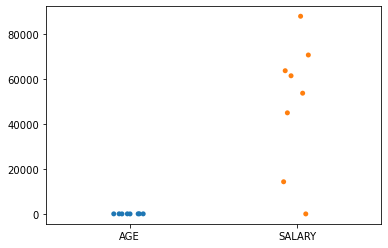

In [33]:
sns.stripplot(data=ds)

In [25]:
df1=df.Country.value_counts()[:]
df1

India      6
France     2
Germany    2
Name: Country, dtype: int64

<AxesSubplot:ylabel='Country'>

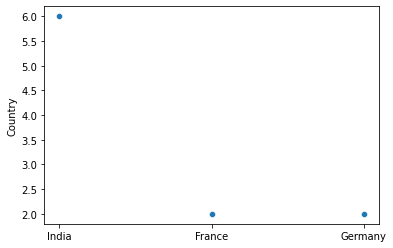

In [27]:
sns.scatterplot(data=df1)

In [39]:
dt=pd.DataFrame({'d1':(np.nan,'A','B'),'d2':('cat1','cat1',np.nan)})
dt

,d1,d2
0,NaN,cat1
1,A,cat1
2,B,NaN


In [40]:
si.strategy

'most_frequent'

In [41]:
si.fit_transform(dt)

array([['A', 'cat1'],
       ['A', 'cat1'],
       ['B', 'cat1']], dtype=object)

In [42]:
dt

,d1,d2
0,NaN,cat1
1,A,cat1
2,B,NaN


In [44]:
dt.d1.fillna(dt.d1.mode())

0    A
1    A
2    B
Name: d1, dtype: object

In [45]:
df[:2]

,COUNTRY,AGE,SALARY,Country
0,India,38.0,68000.0,India
1,France,43.0,45000.0,France


In [49]:
num=df[['AGE','SALARY']]
num

,AGE,SALARY
0,38.0,68000.0
1,43.0,45000.0
2,30.0,54000.0
3,NaN,65000.0
4,40.0,NaN
5,35.0,58000.0
6,NaN,53000.0
7,49.0,79000.0
8,50.0,88000.0
9,37.0,NaN


In [51]:
si_n=SimpleImputer(strategy='mean')
si_n

SimpleImputer()

In [52]:
si_n.strategy

'mean'

In [54]:
si_n.fit_transform(num)

array([[3.800e+01, 6.800e+04],
       [4.300e+01, 4.500e+04],
       [3.000e+01, 5.400e+04],
       [4.025e+01, 6.500e+04],
       [4.000e+01, 6.375e+04],
       [3.500e+01, 5.800e+04],
       [4.025e+01, 5.300e+04],
       [4.900e+01, 7.900e+04],
       [5.000e+01, 8.800e+04],
       [3.700e+01, 6.375e+04]])

# Encoding Categorical data to number:

df.Country.replace({'Germany':0,'India':1,'France':2})

In [56]:
df.Country.replace({'Germany':0,'India':1,'France':2})

0    1
1    2
2    0
3    1
4    0
5    1
6    1
7    1
8    1
9    2
Name: Country, dtype: int64

In [33]:
df.COUNTRY.map({'Germany':0,'India':1,'France':2})

0    1.0
1    2.0
2    0.0
3    NaN
4    0.0
5    1.0
6    1.0
7    1.0
8    1.0
9    2.0
Name: COUNTRY, dtype: float64

In [41]:
df[:2]

,COUNTRY,AGE,SALARY,Country
0,India,38.0,68000.0,India
1,France,43.0,45000.0,France


# sklearn.preprocessing
Label Encoder: Converts category to Numbers

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
lb= LabelEncoder()
lb

LabelEncoder()

In [42]:
col=df[['Country']]    #should be ['Country']
col

,Country
0,India
1,France
2,Germany
3,India
4,Germany
5,India
6,India
7,India
8,India
9,France


In [45]:
col1=df[['Country','COUNTRY']]  
col1

,Country,COUNTRY
0,India,India
1,France,France
2,Germany,Germany
3,India,NaN
4,Germany,Germany
5,India,India
6,India,India
7,India,India
8,India,India
9,France,France


In [46]:
lb.fit_transform(col1) ## doesn't accept 2D array

ValueError: y should be a 1d array, got an array of shape (10, 2) instead.

In [73]:
lb.fit_transform(col)

array([2, 0, 1, 2, 1, 2, 2, 2, 2, 0])

In [70]:
lb.classes_  # is in alphabetical order

array(['France', 'Germany', 'India'], dtype=object)

In [74]:
lb.fit(col)

LabelEncoder()

In [76]:
lb.transform(col)

C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 0, 1, 2, 1, 2, 2, 2, 2, 0])

In [77]:
conv = [2,1,1,2,2,0,0,2,1]
conv

[2, 1, 1, 2, 2, 0, 0, 2, 1]

In [78]:
lb.inverse_transform(conv)

array(['India', 'Germany', 'Germany', 'India', 'India', 'France',
       'France', 'India', 'Germany'], dtype=object)

# OrdinalEncoder : Encode categorical features using an ordinal encoding scheme. OneHotEncoder : Encode categorical features as a one-hot numeric array.

In [79]:
from sklearn.preprocessing import OrdinalEncoder

In [80]:
od=OrdinalEncoder()
od

OrdinalEncoder()

In [88]:
od.fit_transform(df[['Country']]).astype('int32')

array([[2],
       [0],
       [1],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [0]])

In [89]:
od.categories_

[array(['France', 'Germany', 'India'], dtype=object)]

In [100]:
dt.d2

0    cat1
1    cat1
2     NaN
Name: d2, dtype: object

# Dummy variables

In [ ]:
--dummy variables are the which have values 0 and 1.
--dummy variables has columns  equal to number of unique categories present inthe categorical column.
--The value 1 indicates the presence of that variable and 0 represents the not present variables.

ex:              male       female
    male          1            0
    female        0            1 
    female        0            1 
    female        0            1  
    male          1            0
    

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
d = pd.DataFrame({'city':['katraj','wagholi','pune','lonavala','camp','camp','katraj','pune','wagholi','lonavala']})
d

C:\Users\Rakesh\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,city
0,katraj
1,wagholi
2,pune
3,lonavala
4,camp
5,camp
6,katraj
7,pune
8,wagholi
9,lonavala


In [5]:
from sklearn.preprocessing import OneHotEncoder

In [7]:
ohe=OneHotEncoder()
ohe

OneHotEncoder()

In [10]:
ohe.categories

'auto'

In [11]:
d.city.unique()

array(['katraj', 'wagholi', 'pune', 'lonavala', 'camp'], dtype=object)

In [14]:
one_1=ohe.fit_transform(d)
one_1

<10x5 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [18]:
one_1.toarray().astype('int32')

array([[0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0]])

# Dummy variable trap

#### Dummy variable trap is the scenario where there multicollinearty of independent variable  means two or more variables is highly correlated.One variable can be predicted from others.

In [25]:
ohe.categories_

[array(['camp', 'katraj', 'lonavala', 'pune', 'wagholi'], dtype=object)]

In [22]:
pd.concat([d,pd.DataFrame(one_1.toarray().astype('int32'))],axis=1)

,city,0,1,2,3,4
0,katraj,0,1,0,0,0
1,wagholi,0,0,0,0,1
2,pune,0,0,0,1,0
3,lonavala,0,0,1,0,0
4,camp,1,0,0,0,0
5,camp,1,0,0,0,0
6,katraj,0,1,0,0,0
7,pune,0,0,0,1,0
8,wagholi,0,0,0,0,1
9,lonavala,0,0,1,0,0


# get_dummies

In [26]:
pd.get_dummies(d)

,city_camp,city_katraj,city_lonavala,city_pune,city_wagholi
0,0,1,0,0,0
1,0,0,0,0,1
2,0,0,0,1,0
3,0,0,1,0,0
4,1,0,0,0,0
5,1,0,0,0,0
6,0,1,0,0,0
7,0,0,0,1,0
8,0,0,0,0,1
9,0,0,1,0,0


In [44]:
pd.get_dummies(df.Country)

,France,Germany,India
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


# what are different encoding techniques?

In [ ]:
using the pandas methods such as replace(), map(), apply()

-- LabelEncoder: it is encoding of categorical data column in which numeric is given to features and allotment is done accordingly.
    for ex: india:0,germany:1,france:2,.........
--OneHotEncoder: it is encoding of categorical data in which dummy variables whose values are 0,1
where 1 is for the variable present and 0 for remaining.
--get_dummies(): it is encoding of categorical data column in which dummy variables whose values are 0,1 
    and we get the encoding directly without concating dataframe and dummy variable as done in OneHotEnoder.

# How to convert categorical data using pandas

In [ ]:
we can convert the categorical data using 
replace(),map() methods.

# Standard Scaler(STANDARDISATION)

In [20]:
import pandas as pd
df = pd.DataFrame([0.000000000009,2.02451,6584,3542,1544,8754,9896,1232563252365236523652365],columns=['val'])
df

,val
0,0.0
1,2.02451
2,6584
3,3542
4,1544
5,8754
6,9896
7,1232563252365236523652365


In [13]:
from sklearn.preprocessing import StandardScaler

In [21]:
sc= StandardScaler()
sc.fit_transform(df)


array([[-0.37796447],
       [-0.37796447],
       [-0.37796447],
       [-0.37796447],
       [-0.37796447],
       [-0.37796447],
       [-0.37796447],
       [ 2.64575131]])

# NORMALIZER

In [24]:
from sklearn.preprocessing import Normalizer

In [25]:
ms=Normalizer()
ms


Normalizer()

In [26]:
ms.fit_transform(df)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [39]:
d=pd.DataFrame([1,-99999909999995,21,45,78,0.36,-0.023]).astype('i4')
d.dtypes

0    int32
dtype: object

In [37]:
ms.fit_transform(d)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.]])

# BINARIZER

In [40]:
from sklearn.preprocessing import Binarizer

In [44]:
br=Binarizer(threshold=50)
br

Binarizer(threshold=50)

In [45]:
br.fit_transform(d)

array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0]])

In [49]:
print(br.fit_transform(df).astype('i4'))

[[0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
